In [4]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [14]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


## 1 - Import Libraries

Veri setinin elde edilmesi için keras kütüphanesi,

Matematiksel işlemler ve matrislerin düzenlenmesi için numpy kütüphanesi,

Konvolüsyonel sinir ağının oluşturulması ve eğitilmesi için tensorflow kütüphanesi import edildi.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt

/home/zekikus/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 2 - Data Preprocessing

Verinin model tarafından işlenebilecek hale getirilmesi için düzenlenmesi gerekir. 

- İstenen Girdi Formatı:
[Filtre sayısı, Girdi Yüksekliği, Girdi Genişliği, Kanal Sayısı]

Format belirledikten sonra veri seti test,cross_Validation ve train olarak ayrılır.

In [2]:
input_shape = [None, 28, 28, 1]
number_of_classes = 10

# Hiper Parametreler
learning_rate = 0.01
epoch = 10
batch_size = 128

In [3]:
# Eğitim ve Test Verisi
# Data Website:https://www.kaggle.com/yufengg/fashion-mnist/data
train_data = pd.read_csv('dataset/fashion-mnist_train.csv')
test_data = pd.read_csv('dataset/fashion-mnist_test.csv')

print("Training data shape: {}".format(train_data.shape))
print("Test data shape: {}".format(test_data.shape))

Training data shape: (60000, 785)
Test data shape: (10000, 785)


## 3 - Dataset Information

Fashion-MNIST veri seti 28x28 boyutunda, gri tonlamalı 70.000 adet moda ürününden oluşan 10
sınıflık bir veri setidir. Her kategori için 7.000 resim vardır. Eğitim için 60.000, test için 10.000
resim bulunmaktadır. MNIST el yazısı rakamları(Handwritten) veri setinin günümüzde kullanılan
konvolüsyonel sinir ağları için kolay tahmin edilebilir olması ve yüksek doğruluk oranları vermesi yeni
veri seti ihtiyacı doğurmuştur. Bu ihtiyacı karşılamak için Zalando giyim markasının web sitesi
kullanılarak Fashion-MNIST veri seti oluşturulmuştur.

<img src="images/fashionMnist.png" style="width:500px;height:300px;"><br/>
<img src="images/FashionMnist2.png" style="width:700px;height:700px;"><br/>


In [5]:
#Eğitim verisinin ayrılması
train_data_x = train_data.iloc[:, 1:785]
train_data_y = train_data.iloc[:, 0:1]

#Test verisinin ayrılması
test_data_x = test_data.iloc[:, 1:785]
test_data_y = test_data.iloc[:, 0:1]

In [6]:
# Eğitim ve test verileri DataFrame yapısında olduğu için Numpy tarafından işlenebilecek matrislere çevrilir.

train_x = train_data_x.as_matrix()
train_y = train_data_y.as_matrix()

test_x = test_data_x.as_matrix()
test_y = test_data_y.as_matrix()

In [9]:
train_x = train_x.reshape(train_x.shape[0], input_shape[1], 
                          input_shape[2], input_shape[3])
test_x = test_x.reshape(test_x.shape[0], input_shape[1], 
                          input_shape[2], input_shape[3])

In [10]:
train_x, cv_x, train_y, cv_y = train_test_split(train_x, train_y, 
                                                test_size = 5000, random_state = 42)

print("Number of examples in training set: {}".format(train_x.shape[0]))
print("Number of examples in cross validation set: {}".format(cv_x.shape[0]))

Number of examples in training set: 55000
Number of examples in cross validation set: 5000


In [11]:
# Çıktı etiketlerinin one-hot vektöre çevrilmesi
train_y = to_categorical(train_y, 10)
test_y = to_categorical(test_y, 10)


print("Shape of training features: {}".format(train_x.shape))
print("Shape of training labels: {}".format(train_y.shape))
print("Shape of testing features: {}".format(test_x.shape))
print("Shape of testing labels: {}".format(test_y.shape))

Shape of training features: (55000, 28, 28, 1)
Shape of training labels: (55000, 10)
Shape of testing features: (10000, 28, 28, 1)
Shape of testing labels: (10000, 10)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


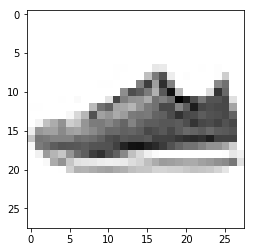

In [20]:

print(test_y[17])
plt.imshow(train_x[17,:,:,-1], cmap='Greys')

## 4 - Define Functions

In [0]:
#Konvolüsyon katmanındaki ilk ağırlıkların standart sapması 0.1 olan normal dağılıma göre ataması yapılır.
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

#Bias değerleri 0.1 olarak atanır.
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

# Maksimum havuzlama işlemini gerçekleştiren fonksiyon tanımlanır.
# Parametreler:
# Stride: Adım sayısı her zaman 2 olarak seçilmiş. Değiştirilebilir.
# ksize: Kernel size, Filter size aynı şey. Filtre boyutu seçilmiş.
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b


### 4.1 Convolution Layer

Bu bölümde konvolüsyon işleminden ve konvolüsyon katmanından bahsedeceğiz. Konvolüsyon katmanı temelde şu adımlardan oluşur:

- Belirli bir boyuta sahip girdi alır.
- Girdinin her pozisyonuna filtre uygular.
- Belirlenen parametrelere göre farklı veya aynı boyutta bir çıktı verir.

Konvolüsyon işlemi verilen girdi üzerindeki özellik haritalarının keşfedilmesi için kullanılır. Bu özelliklerin doğru bir şekilde keşfedilmesi için filtre boyutu ve adım sayısı gibi parametreler çok önemlidir.

 - **Adım Sayısı(Stride):** Filtre adım sayısını belirtir.
 - **Dış boşluk(Padding):** Filtrele eklenecek dış boşluk sayısını belirtir. Padding genel olarak girdi ile çıktı boyutunun aynı olmasının istendiği durumlarda eklenir.
 - Son olarakta filtre boyutu belirlenir.
 
**Bu Parametreler Nasıl Seçilmeli:** Konvolüsyon katmanında seçilen parametreler sonucu doğrudan etkilemektedir. Adım sayısının ve filtre boyutunun büyük seçilmesi, girdi üzerindeki birçok özelliğin kaybedilmesine neden olabilir. Aynı zamanda adım sayısı ve filtre boyutunun küçük seçilmesi özelliklerin yakalanmasını sağlayabilir fakat hesaplama süresini ve işlem yükünü arttırabilir. Bu nedenlerden dolayı bu parametrelerin doğru bir şekilde seçilmesi çok önemlidir.

Aşağıdaki şekilde tek kanaldan oluşan bir girdi için konvolüsyon işlemi gösterilmektedir.

<img src="images/Convolution_schematic.gif" style="width:400px;height:300px;">

Aşağıdaki şekilde kanal sayısı 3 olan bir girdi üzerine 3x3x3 boyutunda bir filtre uygulanması sonucu elde edilen
3x3x2 boyutunda çıktı görülmektedir. Çıktı boyutuna bakıldığında, 3-> genişlik, 3->yükseklik ve 2->filtre sayısını temsil etmektedir

<img src="images/1.gif" style="width:600px;height:400px;">
<img src="images/rgb.gif" style="width:600px;height:400px;">


**Hatırlatıcı:**
    Konvolüsyon işleminden sonra elde edilecek çıktıların boyutu şu işlemlere göre hesaplanır:
    $$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
    $$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
    $$ n_C = \text{Konvolüsyonda kullanılan filtre sayısı}$$
    
### 4.2 Rectifier Linear Unit (ReLu)
- Her konvolüsyon katmanından sonra uygulanır.
- Girdi içerisindeki bütün negatif piksel değerlerini, sıfır ile değiştirir.

<img src="images/relu.png" style="width:300px;height:200px;">

ReLu, tanh ve eş değelerinden birkaç kat daha hızlı çalışır.<br/><br/>
ReLu'nun daha iyi olmasının nedeni kabaca doyum noktası olmamasıdır(non-saturating). ReLu aktivasyon fonksiyonu f(x) = max(0,x) şeklinde formüle edilir. Yani bütün değerler [0, +sonsuz] aralığındadır.<br/><br/>
Fakat diğer aktivasyon fonksiyonlarına baktığımızda;<br/><br/>
Sigmoid = [0,1] aralığına ve tanh = [-1,1] aralığına noktaları indirger. Çok derin sinir ağlarında bu fonksiyonlar belirli bir noktadan sonra doyuma ulaşır. Fakat ReLu'da durum böyle değildir. Bu yüzden tercih edilir.

In [ ]:
# Konvolüsyon işlemini gerçekleştiren fonksiyon tanımlanır.
# Parametreler:
# Stride: Adım sayısı her zaman 1 olarak seçilmiş. Değiştirilebilir.
# Padding: SAME olarak seçilmiş. Yani konvolüsyon işlemi uygulandıktan sonra çıktı boyutu küçülmeyecek.
# Girdi ve çıktı boyutu aynı kalacak. Resim boyutu küçük olduğu için kullanıldı.
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

    
# Konvolüsyon katmanı işlemleri gerçekleştirilir.
# Konvolüsyon -> ReLu
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

# Alternatif olarak Tensorflow son versiyon ile gelen fonksiyon kullanılabilir. "nn.conv2d" ve "layers.conv2d"
# neredeyse aynıdır. Fakat "layers.conv2d" yapılandırıcısı çok daha fazla parametreye sahiptir ve daha esnektir.
tf.layers.conv2d(inputs=x,filters=32, kernel_size = [3,3], padding="same", activation=tf.nn.relu)


### 4.3 Pooling Layer
Havuzlama(Pooling) katmanı, girdinin yüksekliğini ve genişliğini azaltır. Hesaplama yükünü azaltmaya yardımcı olur. Sıklıkla kullanılan iki tür havuzlama(pooling) yöntemi vardır:

- **Max-pooling layer:** Maksimum havuzlama yönteminde, belirli bir adım değerine(stride) göre havuzlama filtresi girdi üzerinde dolaşır ve girdi üzerinde filtrenin bulunduğu alana karşılık gelen kısım içerisindeki maksimum değeri, çıktıda karşılık gelen alana yerleştirir.
- **Average-pooling layer:** Aynı işlem ortalama havuzlama işlemi için de geçerlidir. Fakat bu sefer maksimum eleman yerine girdide filtrenin bulunduğu alana karşılık gelen kısımdaki değerlerin ortalaması çıktı olarak verilir.
<img src="images/Stride_2_Max_Avg_Pooling.png" style="width:600px;height:300px;"><br/>
<img src="images/pooling.gif" style="width:400px;height:200px;">

**Hatırlatıcı:**
    Dış boşluk(padding) olmadığı için havuzlama işlemi sonrası elde edilecek çıktı boyutu aşağıdaki formüllere göre hesaplanır. Dikkat edilirse havuzlama işleminden sonra kanal sayısı değişmemektedir. Ayrıca konvolüsyon katmanından farklı olarak havuzlama katmanından öğrenilmesi gereken bir parametre yoktur. Sadece adım sayısı ve filtre boyutu belirlenir. Konvolüsyon işleminde ise filtre katsayıları belirli bir öğrenme algoritmasına göre öğrenilip, güncellenir.
    $$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$
    $$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$
    $$ n_C = n_{C_{prev}}$$

In [ ]:
# Maksimum havuzlama işlemini gerçekleştiren fonksiyon tanımlanır.
# Parametreler:
# Stride: Adım sayısı her zaman 2 olarak seçilmiş. Değiştirilebilir.
# ksize: Kernel size, Filter size aynı şey. Filtre boyutu seçilmiş.
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1])

# Alternatif
tf.layers.max_pooling2d(inputs=convo_2, pool_size=[2, 2], strides=2)

### 4.4 Fully Connected Layer

Çok katmanlı yapay sinir ağlarında olduğu gibi birbirlerine tamamen bağlı olan nöronları içerir. Daha önceki katmanda öğrenilen özelliklere göre girdinin sınıflandırılması yapılır. 

<img src="images/fully_connected.png" style="width:600px;height:300px;">

In [ ]:
# Tam Bağlantılı Katman fonksiyonu oluşturulur.
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

# Alternatif
tf.layers.dense(inputs=flatten, units = 512, activation=tf.nn.relu)

## 5 - Create Model

In [0]:
#Tensorflow Graph Oluşturulması

# Graph Reset
tf.reset_default_graph()

# Placeholder tanımlama
x = tf.placeholder(tf.float32,shape=[None,28,28,1])
y_true = tf.placeholder(tf.float32,shape=[None,10])
train_mode = tf.placeholder(tf.bool)

config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allow_growth = True
config.gpu_options.allocator_type = 'BFC'

with tf.name_scope('Model'):
    #Convolutional Layer 1 + RELU
    convo_1 = tf.layers.conv2d(inputs=x,filters=32, kernel_size = [5,5], padding="same", activation=tf.nn.relu)
    #Pooling Layer 1
    convo_1_pooling = tf.layers.max_pooling2d(inputs=convo_1, pool_size=[2, 2], strides=2)
    #Convolutional Layer 2 + RELU
    convo_2 = tf.layers.conv2d(inputs=convo_1_pooling,filters=64, kernel_size = [5,5], padding="same", activation=tf.nn.relu)
    #Pooling Layer 2
    convo_2_pooling = tf.layers.max_pooling2d(inputs=convo_2, pool_size=[2, 2], strides=2)
    #Flattening
    convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])
    #Fully Connected 1 + RELU
    full_layer_one = tf.layers.dense(inputs=convo_2_flat, units = 1024, activation=tf.nn.relu)
    #Dropout Layer 1
    full_one_dropout = tf.layers.dropout(full_layer_one,rate=0.2, training= train_mode)
    #Output Layer
    y_pred = tf.layers.dense(inputs=full_one_dropout,units=10)

#Loss function
with tf.name_scope('Loss'):
    loss = tf.losses.softmax_cross_entropy(y_true, y_pred)

#Optimizer Function
with tf.name_scope('ADAM'):
     train_op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

#Defining Accuracy
with tf.name_scope('Accuracy'):
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1)), tf.float32))

In [30]:
with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    
    total_size = train_x.shape[0]
    number_of_batches = int(total_size/batch_size)
    
    print("Training:Start")
    for e in range(epoch):
        epoch_cost = 0
        epoch_accuracy = 0
        for i in range(number_of_batches):
            mini_x = train_x[i*batch_size:(i+1)*batch_size, :, :, :]
            mini_y = train_y[i*batch_size:(i+1)*batch_size, :]
            _, cost = sess.run([train_op,loss], feed_dict={x:mini_x, y_true:mini_y,train_mode:True})
            train_accuracy = sess.run(accuracy, feed_dict={x:mini_x, y_true:mini_y,train_mode:False})
            epoch_cost += cost
            epoch_accuracy += train_accuracy
        
        # Batch sayısının tam sayı olmadığı durumlarda kullanılır.
        if total_size % batch_size != 0:
            mini_x = train_x[number_of_batches*batch_size:total_size, :, :, :]
            mini_y = train_y[number_of_batches*batch_size:total_size, :]
            _, cost = sess.run([train_op, loss], feed_dict={x:mini_x, y_true:mini_y, train_mode:True})
            train_accuracy = sess.run(accuracy, feed_dict={x:mini_x,y_true:mini_y, train_mode:False})
            epoch_cost += cost
            epoch_accuracy += train_accuracy
        
        epoch_cost /= number_of_batches
        
        if total_size % batch_size != 0:
            epoch_accuracy /= (number_of_batches+1)
        else:
            epoch_accuracy /= number_of_batches
        print("Epoch: {} Cost: {} accuracy: {} ".format(e+1, np.squeeze(epoch_cost), epoch_accuracy))
    
    # Cross-validation loss ve accuracy değerleri
    cv_loss, cv_accuracy = sess.run([loss, accuracy], {x:cv_x, y_true:cv_y, train_mode: False})
    print("Cross validation loss: {} accuracy: {}".format(np.squeeze(cv_loss), cv_accuracy))
    
    # Test Veri seti accuracy değeri
    test_accuracy = sess.run(accuracy,{x:test_x, y_true:test_y,train_mode:False})
    print("Test set accuracy {}".format(test_accuracy))

Training:Start
Epoch: 1 Cost: 5.577052316604516 accuracy: 0.81015625 
Epoch: 2 Cost: 0.42855561620149857 accuracy: 0.8660924286343331 
Epoch: 3 Cost: 0.4011812515747853 accuracy: 0.8741774577041005 
Epoch: 4 Cost: 0.3845257364508711 accuracy: 0.880947740549265 
Epoch: 5 Cost: 0.38129384961578394 accuracy: 0.8835623678772948 
Epoch: 6 Cost: 0.3676989783287604 accuracy: 0.887513213518054 
Epoch: 7 Cost: 0.37551678956805407 accuracy: 0.8886231501435125 
Epoch: 8 Cost: 0.3687285174787183 accuracy: 0.8897760306679925 
Epoch: 9 Cost: 0.3910354154579567 accuracy: 0.8859705338644427 
Epoch: 10 Cost: 0.40267761888759673 accuracy: 0.8849976876447367 
Cross validation loss: 0.4488774538040161 accuracy: 0.8532000184059143
Test set accuracy 0.8640999794006348


### Veriler normalize edilmeden(Non-Scaling) ve normalize edildikten(Scaling) sonra ağın eğitilmesiyle elde edilen başarı oranları:

<img src="images/Scaling_Plot.png" style="width:500px;height:400px;">